In [2]:
using PyPlot,JLD2,CALCEPH
rc("font",family="serif")
include("CGS.jl")

Main.CGS

Using $\sqrt{e} \cos{\omega}$ and $\sqrt{e} \sin{\omega}$ as priors, doesnt work properly. don't know why. Reverted to previous prior $e \cos{\omega}$ and $e \sin{\omega}$

In [4]:
eph = Ephem("INPUTS/DE440.bsp");prefetch(eph)

In [5]:
jd1 = 2.4332825e6
jd2 = 2.4478925e6
jdsize = 1000
t0 = range(jd1,stop=jd2-1,length = jdsize)
sigma = 30.0
AU = 149597870.700 #km
include("sim_times.jl")

sim_times (generic function with 5 methods)

In [7]:
tt1,tt2,n_obs,pva_sun,pva_venus,pva_earth = sim_times(jd1,jd2,jdsize,true,sigma,true)

([2.433503764417094e6, 2.4337284657592718e6, 2.43395316865273e6, 2.4341778674054984e6, 2.43440256663597e6, 2.434627271414636e6, 2.434851972427262e6, 2.435076671829833e6, 2.435301369837278e6, 2.435526069859001e6  …  2.446087006800296e6, 2.446311711381288e6, 2.4465364127597352e6, 2.446761112602691e6, 2.4469858106463156e6, 2.4472105105726174e6, 2.4474352158449646e6, 2.4476599158511967e6, 2.4478846141335433e6, 2.4481093143306626e6], [2.4336244053663155e6, 2.433989659466925e6, 2.434354916550314e6, 2.434720170357399e6, 2.4350854292193605e6, 2.4354506863933094e6, 2.4358159384629615e6, 2.4361811952688014e6, 2.4365464521077164e6, 2.436911708642025e6  …  2.44494734986025e6, 2.445312607972126e6, 2.4456778645913163e6, 2.4460431244665715e6, 2.4464083792552324e6, 2.446773637153529e6, 2.4471388937385385e6, 2.4475041465112804e6, 2.4478694048660602e6, 2.448234661849949e6], [0.22607070756254913, 0.8936832885768102, 0.3875851066549205], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.

In [8]:
pva0 = zeros(9,length(tt2))
pva1 = zeros(9,length(tt2))
pva2 = zeros(9,length(tt2))
options=useNaifId+unitKM+unitDay
for i=1:length(tt2)
pva0[1:9,i] = compute(eph,tt1[i],0.5,10,10,options,2)./AU
pva1[1:9,i] = compute(eph,tt1[i],0.5,2,10,options,2)./AU
# if include_moon
#   pva_2[1:9,i] = compute(eph,t0[i],0.5,3,10,options,2) 
# else
pva2[1:9,i] = compute(eph,tt2[i],0.5,399,10,options,2)./AU
end

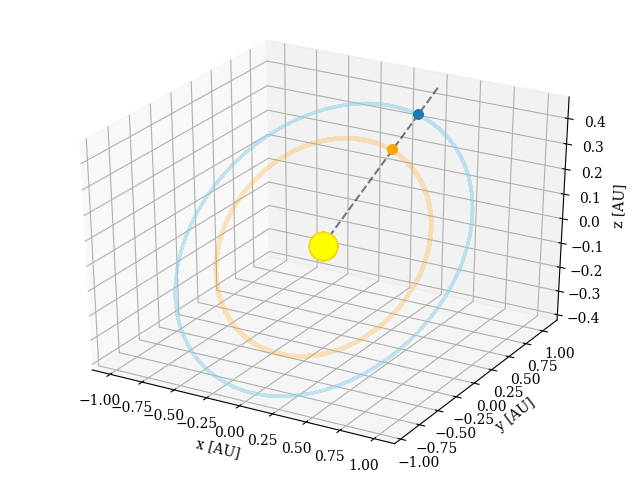

PyObject Text(0.08689372373947965, 0.011641551551663236, 'z [AU]')

In [9]:
theta_sun = range(0,stop = 2*pi,length = 100)
xsun = CGS.RSUN/CGS.AU * cos.(theta_sun)
ysun = CGS.RSUN/CGS.AU * sin.(theta_sun)

fig=figure(figsize=(8,6))
# PyPlot.scatter3D(1,0,0,color=:black,marker="s")
# PyPlot.text3D(1.1,0,0,"x")
# PyPlot.scatter3D(1,0,0,color=:black,marker=">")
# PyPlot.scatter3D(0,-1.2,0,color=:black,marker="<")
# PyPlot.scatter3D(0,0,1,color=:black,marker="^")
# PyPlot.plot3D([0,1*1.5],[0,0*1.5],[0,0*1.5],linewidth=3,color=:gray)
# PyPlot.plot3D([0,0*1.5],[0,-1*1.5],[0,0*1.5],linewidth=3,color=:gray)
# PyPlot.plot3D([0,0*1.5],[0,0*1.5],[0,1*1.5],linewidth=3,color=:gray)
# PyPlot.scatter3D(xsun,ysun,0,marker="o",color=:yellow,ms=20)
PyPlot.plot3D(vec(pva_venus[1,:]), vec(pva_venus[2,:]), vec(pva_venus[3,:]),color=:orange,label="Venus Orbit",alpha=0.25)
PyPlot.plot3D(vec(pva_earth[1,:]), vec(pva_earth[2,:]), vec(pva_earth[3,:]),color=:skyblue,label="Earth Orbit",alpha=0.5)
PyPlot.plot3D([0,n_obs[1]*1.2],[0,n_obs[2]*1.2],[0,n_obs[3]*1.2],linestyle="--",color=:black,alpha=0.5)
PyPlot.plot3D(vec(pva0[1,:]), vec(pva0[2,:]), vec(pva0[3,:]),color=:yellow,marker="o",ms=20,mec=:gold)
PyPlot.plot3D(vec(pva1[1,:]),vec(pva1[2,:]),vec(pva1[3,:]),color=:orange,marker="o")
PyPlot.plot3D(vec(pva2[1,:]),vec(pva2[2,:]),vec(pva2[3,:]),marker="o")
# ax.tick_params(which="minor",direction="in",length=2,
#     left="false",right="false",top="true",bottom="true",
#     labelbottom="false",labeltop="false",labelleft="false",labelright="false")
# xlim(-1,1)
# ylim(-1,1)
xlabel("x [AU]")
ylabel("y [AU]")
zlabel("z [AU]")
# legend(loc="best")
# legend(["Transits"])
# ax[:view_init](30, 180)

In [ ]:
fig=figure(figsize=(6,6))
subplot(211)
ax1=gca()
ax1.plot(vec(pva_sun[2,:]),vec(pva_sun[3,:]),label="Sun",color=:yellow,marker="o")
# ax1.plot(vec(pva_sun[2,:]),vec(pva_sun[3,:]),color=:yellow,marker="o",mec="black")
ax1.plot(vec(pva_venus[2,:]),vec(pva_venus[3,:]),label="Venus",color=:orange)
ax1.plot(vec(pva_earth[2,:]),vec(pva_earth[3,:]),label="Earth")
# ax1.plot([0,n_obs[2]*1.1],[0,n_obs[3]*1.1],color=:black)
# ax1.tick_params(which="major",direction="in",length=6,
#     left="false",right="false",top="false",bottom="false",
#     labelbottom="false",labeltop="false",labelleft="false",labelright="false")
xlabel("[AU]")
ylabel("[AU]")
# legend(loc="lower left")

subplot(212)
ax2=gca()
ax2.scatter(vec(pva0[1,:]),vec(pva0[3,:]),color=:yellow,marker="o",edgecolors="black")
# ax2.scatter(pva_venus[1,imin1],pva_venus[2,imin1],label="Venus Transit",color=:orange)
ax2.plot(vec(pva_venus[1,:]),vec(pva_venus[3,:]),color=:gray)
ax2.scatter(vec(pva1[1,:]),vec(pva1[3,:]),label="Venus",color=:orange,marker=".")
# ax2.scatter(pva_earth[1,imin2],pva_earth[2,imin2],label="Earth Transit")
ax2.plot(vec(pva_earth[1,:]),vec(pva_earth[3,:]),color=:gray)
ax2.scatter(vec(pva2[1,:]),vec(pva2[3,:]),label="Earth",marker=".")
ax2.plot([0,n_obs[1]*1.1],[0,n_obs[3]*1.1],"k--")
# ax2.tick_params(which="major",direction="in",
#     left="true",right="false",top="false",bottom="true",
#     labelbottom="true",labeltop="false",labelleft="true",labelright="false")
ax2.legend()
xlabel("[AU]")
ylabel("[AU]")
show()

In [187]:
calc_deg(value) = value * 180/pi
calc_rad(value) = value * pi/180
function extract_data(filename)
	f = jldopen(String(filename), "r")
	return f["pbest_global"]
end
function evec(ecc,om)
    omega = calc_rad(om)
    ecosw = ecc*cos(omega)
    esinw = ecc*sin(omega)
    return ecosw,esinw
end

evec (generic function with 1 method)

In [202]:
mu_1,P_1,t01,e1cosw1,e1sinw1,
mu_2,P_2,t02,e2cosw2,e2sinw2,
mu_3,P_3,t03,e3cosw3,e3sinw3,
tmaxsinphi0,tmaxcosphi0,deltaphi = extract_data("OUTPUTS/moon_fittry1params.jld2")

18-element Array{Float64,1}:
    2.5275788989834023e-6
  224.70077098675895     
    2.433503768851615e6  
    0.00285673419852034  
    0.0007550609482464021
    3.04375001408466e-6  
  365.25646214139175     
    2.433624407402546e6  
    0.015037015083073492 
    0.0029763518560029555
    0.000941720902889919 
 4309.232984673987       
    2.443388213396815e6  
    0.02441377873531106  
   -0.03777031122605469  
    9.295524225689489e-5 
   -0.0016399728262300934
    2.312317961379825    

In [203]:
@load("NYR40/moon_try1mcmc.jld2")

8-element Array{Symbol,1}:
 :par_mcmc    
 :lprob_mcmc  
 :param       
 :nwalkers    
 :nsteps      
 :accept      
 :iburn       
 :indepsamples

In [204]:
include("decompose_ttvs.jl")
include("plot_ttvs.jl")
include("plot_likelihood.jl")
include("corner_plot.jl")

corner_planet (generic function with 3 methods)

In [193]:
evec(0.00677323,131.53298)

(-0.004490997226230397, 0.005070265135758768)

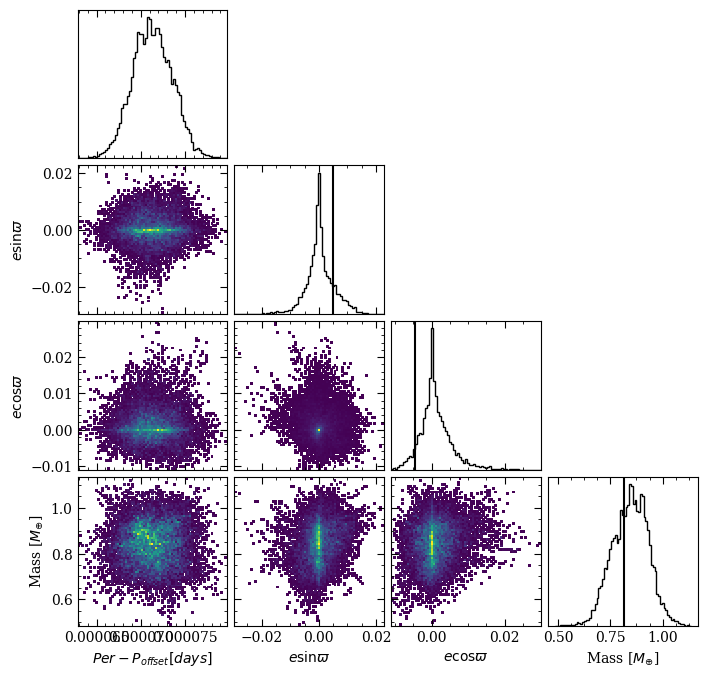

In [213]:
corner_planet(vec(par_mcmc[1:10,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH,
    (vec(par_mcmc[1:10,iburn:nsteps,4]).*sqrt.(vec(par_mcmc[1:10,iburn:nsteps,4]).^2 .+ vec(par_mcmc[1:10,iburn:nsteps,5]).^2)),
    (vec(par_mcmc[1:10,iburn:nsteps,5]).*sqrt.(vec(par_mcmc[1:10,iburn:nsteps,4]).^2 .+ vec(par_mcmc[1:10,iburn:nsteps,5]).^2)),
    vec(par_mcmc[1:10,iburn:nsteps,2]),75,
0.815,-0.0044,0.0051,224.7007992,"venus")

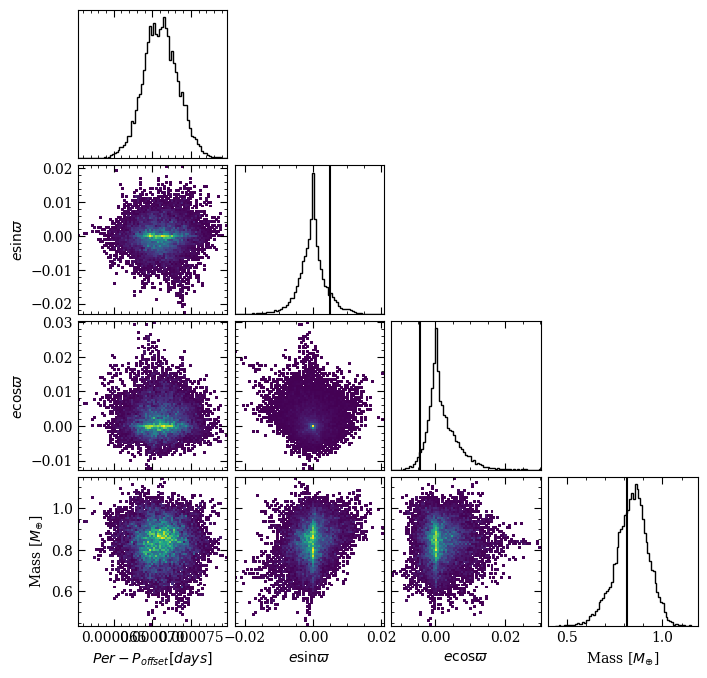

In [214]:
corner_planet(vec(par_mcmc[11:20,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH,
    (vec(par_mcmc[11:20,iburn:nsteps,4]).*sqrt.(vec(par_mcmc[11:20,iburn:nsteps,4]).^2 .+ vec(par_mcmc[11:20,iburn:nsteps,5]).^2)),
    (vec(par_mcmc[11:20,iburn:nsteps,5]).*sqrt.(vec(par_mcmc[11:20,iburn:nsteps,4]).^2 .+ vec(par_mcmc[11:20,iburn:nsteps,5]).^2)),
    vec(par_mcmc[11:20,iburn:nsteps,2]),75,
0.815,-0.0044,0.0051,224.7007992,"venus")

In [ ]:
corner_planet(vec(par_mcmc[1:10,iburn:nsteps,1]).* CGS.MSUN/CGS.MEARTH,
    (vec(par_mcmc[1:10,iburn:nsteps,4]).*sqrt.(vec(par_mcmc[1:10,iburn:nsteps,4]).^2 .+ vec(par_mcmc[1:10,iburn:nsteps,5]).^2)),
    (vec(par_mcmc[1:10,iburn:nsteps,5]).*sqrt.(vec(par_mcmc[1:10,iburn:nsteps,4]).^2 .+ vec(par_mcmc[1:10,iburn:nsteps,5]).^2)),
    vec(par_mcmc[1:10,iburn:nsteps,2]),75,
0.815,-0.0044,0.0051,224.7007992,"venus")

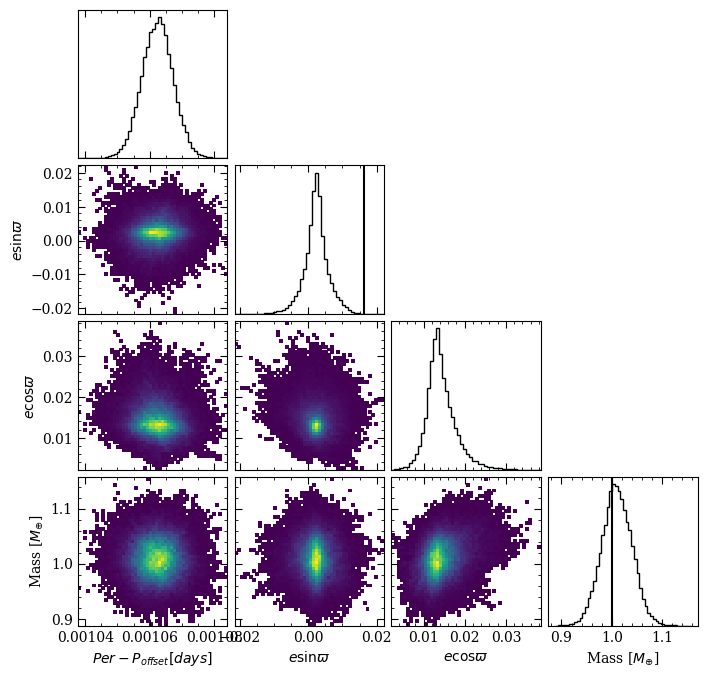

In [207]:
corner_planet(vec(par_mcmc[:,1:nsteps,6]).* CGS.MSUN/CGS.MEARTH,
    (vec(par_mcmc[:,1:nsteps,9]).*sqrt.(vec(par_mcmc[:,1:nsteps,9]).^2 .+ vec(par_mcmc[:,1:nsteps,10]).^2)),
    (vec(par_mcmc[:,1:nsteps,10]).*sqrt.(vec(par_mcmc[:,1:nsteps,9]).^2 .+ vec(par_mcmc[:,1:nsteps,10]).^2)),
    vec(par_mcmc[:,1:nsteps,7]),50,
1,-0.00374,0.016285,365.2564,"earth")

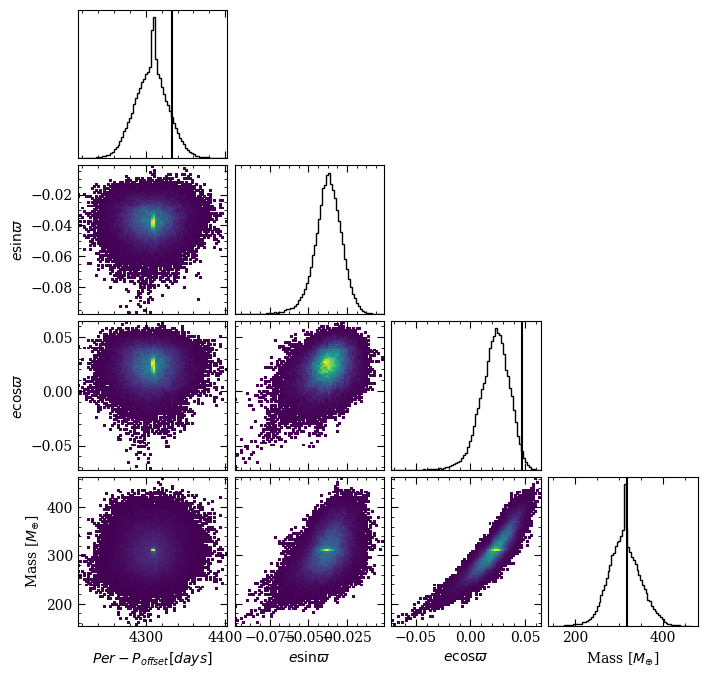

In [206]:
corner_planet(vec(par_mcmc[:,1:nsteps,11]).* CGS.MSUN/CGS.MEARTH,
     (vec(par_mcmc[:,1:nsteps,14]).*sqrt.(vec(par_mcmc[:,1:nsteps,14]).^2 .+ vec(par_mcmc[:,1:nsteps,15]).^2)),
   (vec(par_mcmc[:,1:nsteps,15]).*sqrt.(vec(par_mcmc[:,1:nsteps,14]).^2 .+ vec(par_mcmc[:,1:nsteps,15]).^2)),
    vec(par_mcmc[:,1:nsteps,12]),75,
318,0.0468,0.0123,4332.82012875,"jup")

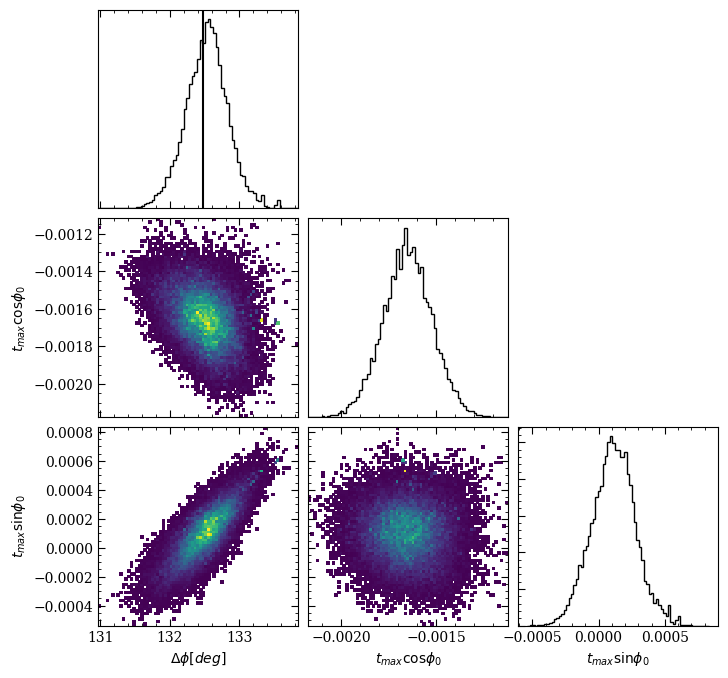

In [174]:
corner_moon(vec(par_mcmc[:,iburn:nsteps,16]),
    vec(par_mcmc[:,iburn:nsteps,17]),
    vec(par_mcmc[:,iburn:nsteps,18]).*57.2957795,75,
 0.00001,0.00001,2.3122.*57.2957795,"moon")

Using original prior on eccentricity.

In [183]:
mu_1,P_1,t01,e1cosw1,e1sinw1,
mu_2,P_2,t02,e2cosw2,e2sinw2,
mu_3,P_3,t03,e3cosw3,e3sinw3,
tmaxsinphi0,tmaxcosphi0,deltaphi = extract_data("OUTPUTS/moon_fitmtry3params.jld2")
@load("mcmc_mtry3results.jld2")

8-element Array{Symbol,1}:
 :par_mcmc    
 :lprob_mcmc  
 :param       
 :nwalkers    
 :nsteps      
 :accept      
 :iburn       
 :indepsamples

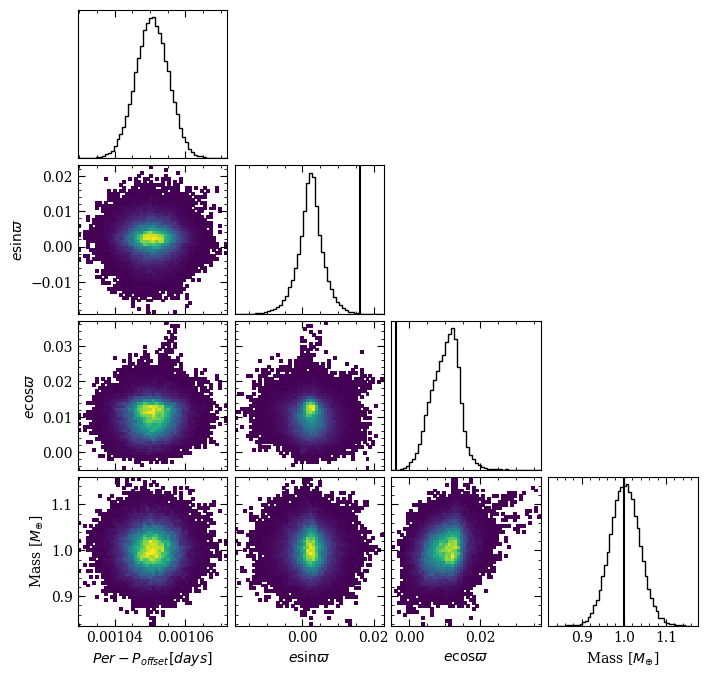

In [190]:
corner_planet(vec(par_mcmc[:,iburn:nsteps,6]).* CGS.MSUN/CGS.MEARTH,
    vec(par_mcmc[:,iburn:nsteps,9]),
    vec(par_mcmc[:,iburn:nsteps,10]),
    vec(par_mcmc[:,iburn:nsteps,7]),50,
1,-0.00374,0.016285,365.2564,"earth")

In [188]:
evec(0.01671022,102.94719)

(-0.0037439728139313944, 0.016285395912195154)

In [186]:
cos(pi)

-1.0

In [216]:
3216/800

4.02